<a href="https://colab.research.google.com/github/ngtinc21/Machine-Learning-Algorithms/blob/main/ANN_Example_1_Animal_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Example 1.**
### Image Classification - Dogs, Cats, and Pandas

### i. Data Acquisition

fatal: destination path 'Dog-Cat-Panda_Images' already exists and is not an empty directory.


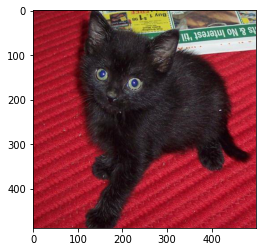

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
! git clone https://github.com/PrefaceCoding/Dog-Cat-Panda_Images

# Import the os package, from which, load in the listdir function
from os import listdir

# Create an empty list, filenames
filenames = []

# Add the name of each image in the animals/animals folder into the filenames list, 
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k): 
    file2 = k+"/"+file1
    for file3 in listdir(file2):
        filenames.append(file3)

# Randomly take out a filename
sample = np.random.choice(filenames)

# Use interpolation to link to the directory
category = sample.split("_")[0]

# Show the image
from keras.preprocessing.image import load_img
img = load_img(f"Dog-Cat-Panda_Images/animals/animals/{category}/{sample}")
plt.imshow(img)

In [ ]:
# In the keras.preprocessing.image package, load in the functions load_img and img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Create two empty lists, x and y
x=[]
y=[]

# Load each image in the animals/animals folder using a for loop
# Using the load_img and img_to_array functions, load all the images into a list x
# and add the corresponding classification into list y
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k):
    file2=k+"/"+file1
    for file3 in listdir(file2):
        file4=file2+"/"+file3
        image = load_img(file4,target_size=(108,108,3))
        img_array = img_to_array(image)
        x.append(img_array)
        y.append(file1)

# Check the length of both lists to ensure they are both the same length
len(x),len(y)

(3000, 3000)

### ii. Data Preprocessing

In [ ]:
# Normalise the values of the pixel by redefining them as a numpy array from a range 0:255 to 0:1
x = np.array(x)/255

# Now check the shape of the variable
# x should have a shape of (3000, 108, 108, 3), signifying 3000 images, of 108x108 with 3 RGB layers
print(x.shape)

(3000, 108, 108, 3)


In [ ]:
# Transform the data by redefining them as a numpy array
y = np.array(y)

# Now check the shape of the variable
# y should have a shape of (3000,), signifying 3000 labels
print(y.shape)

(3000,)


In [ ]:
# Apply the LabelEncoder function for the classification list
# Encode target labels with value between 0 and n_classes-1, in which n_classes = 3 in this case
# The transformer should be used to encode target values, i.e. y, and not the input X.
# Import the function
from sklearn.preprocessing import LabelEncoder

# Set a variable to initialise the function
k = LabelEncoder()

# Use the .fit_transform method from the function, and fit to the data y, then transform it
y= k.fit_transform(y)
y

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
# Import the to_categorical function from the keras.utils package
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Redefine y by classifying the class vector (integers) as a binary class matrix
y = to_categorical(y)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
y.shape

(3000, 3)

In [ ]:
# pip list

### iii. Model Building & Training

In [ ]:
# Split x and y into a using a 1/3 split
# Select a fix dataset from random_state = 0 for easy illustration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

# Import a model
from keras.models import Sequential

# Instanstiation
classifier = Sequential()

# Add layers
from tensorflow import keras
from keras.layers import Flatten
from keras.layers import Dense

# Flatten Layer ################################################################################################### -> CNN
classifier.add(Flatten(input_shape=(108, 108, 3)))

# Hidden Layer
#   Initialise the Dense layer, using a 128 node input and 'relu' as the activation
classifier.add(Dense(128, activation="relu"))

#   Generate a second layer the same as the first Dense layer but using 64 nodes instead of 128
classifier.add(Dense(64, activation="relu"))

# Output layer
#   Create a Dense layer, with the 
#   - number of classifications as the number of nodes
#   - softmax as the activation criteria
classifier.add(Dense(3, activation="softmax"))

# Show tht number of parameters in each layer
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 34992)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4479104   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,487,555
Trainable params: 4,487,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Import the SGD function - gradient descent (with momentum) optimizer from keras.optimizers 
# Call the function with learning rate = 0.01, and momentum = 0.9
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)

#loss = ..
# Compile the model, with the SGD variable as the optimizer, and the appropriate loss, and metrics
classifier.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
x.shape

(3000, 108, 108, 3)

In [ ]:
# Fitting the ANN to the dataset
classifier.fit(x_train,y_train,epochs=20)  # if the accuracy is decreasing, it is a signal of overfitting!

Epoch 1/20
63/63 [==============================] - 2s 28ms/step - loss: 1.1864 - accuracy: 0.4815
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 0.9597 - accuracy: 0.5345
Epoch 3/20
63/63 [==============================] - 2s 27ms/step - loss: 0.8713 - accuracy: 0.5490
Epoch 4/20
63/63 [==============================] - 2s 27ms/step - loss: 0.8248 - accuracy: 0.5580
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 0.9056 - accuracy: 0.5195
Epoch 6/20
63/63 [==============================] - 2s 27ms/step - loss: 0.8142 - accuracy: 0.5620
Epoch 7/20
63/63 [==============================] - 2s 27ms/step - loss: 0.8002 - accuracy: 0.5680
Epoch 8/20
63/63 [==============================] - 2s 26ms/step - loss: 0.8497 - accuracy: 0.5535
Epoch 9/20
63/63 [==============================] - 2s 25ms/step - loss: 0.7615 - accuracy: 0.5895
Epoch 10/20
63/63 [==============================] - 2s 27ms/step - loss: 0.7423 - accuracy: 0.5870
Epoch 11/

### iv. Model Prediction

In [ ]:
# Prediction (Verify)
# Import the softmax layer
from keras.layers import Softmax

# Import the Sequential model
from keras.models import Sequential

# Generate the prediction model
prediction_model = Sequential([classifier,Softmax()])

# Prepare the verify test images located in the /images folder
# Add it into two new lists
x_verify=[]
y_verify=[]
k="Dog-Cat-Panda_Images/images"
for file in listdir(k):
  filename = k+"/"+file
  image = load_img(filename,target_size=(108,108,3))
  img_array = img_to_array(image)
  x_verify.append(img_array)
  y_verify.append(file.split(".")[0])

# Using the model, make a prediction onto sample images in the /images folder (remember to normalise the sample images first)
x_verify = np.array(x_verify)
prediction_verify = prediction_model.predict(x_verify)

In [ ]:
# Generate the predicted output and the actual label with a series of print statements
for num,predict in enumerate(prediction_verify):
  index = np.argmax(predict)
  if index == 0:
    index = "cats"
  elif index == 1:
    index = "dogs"
  else:
    index = "panda"
print(f"prediction : {index}\n")
print(f"actual label : {y_verify[num]}\n")

prediction : panda

actual label : panda



In [ ]:
# Prediction (dataset)
# Use the prediction model to make a prediction (may take a couple minutes)
prediction = classifier.predict(np.array(x_test))

In [ ]:
# Take a random prediction, and compare the predicted label to the actual label in the y_test list
random = np.random.randint(0,len(np.array(x_test)))

predict = np.argmax(prediction[random])
if predict == 0:
  predict = "cats"
elif predict == 1:
  predict = "dogs"
else:
  predict = "panda"

print(f"prediction : {predict}")
print(f'matrix : {prediction[random]}')
print(f"actual label : {y_test[random]}")


prediction : panda
matrix : [0.2705193  0.32867366 0.40080705]
actual label : [1. 0. 0.]


### v. Model Evaluation

In [ ]:
# Evaluate the accuracy of the model
loss, acc =classifier.evaluate(x_test,y_test, verbose=0)
acc

0.5410000085830688

### vi. Model Tuning (Keras tuner)

In [ ]:
# pip install keras-tuner --upgrade
import keras_tuner as kt
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import callbacks

def build_model(hp):
  classifier = keras.Sequential()
  classifier.add(Flatten(input_shape=(108, 108, 3)))
  for i in range(hp.Int('layers',1,3)):
    classifier.add(Dense(units = hp.Int('unit_'+str(i), 64, 512, step = 64), activation = hp.Choice('activation_' + str(i), ['tanh', 'relu', 'elu'])))
  classifier.add(Dense(3, activation="softmax"))
  opt = hp.Choice('opt', ['adam','sgd'])
  classifier.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
  return classifier

In [ ]:
tuner = kt.BayesianOptimization(
    hypermodel = build_model,
    objective = kt.Objective('val_loss',direction = 'min'),
    max_trials = 10,
    directory = 'my_dir')
tuner.search(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Trial 10 Complete [00h 00m 41s]
val_loss: 0.8060514330863953

Best val_loss So Far: 0.7895006537437439
Total elapsed time: 00h 19m 46s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
unit_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': None}
activation_0 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'elu'], 'ordered': False}
opt (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}
unit_1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': None}
activation_1 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'elu'], 'ordered': False}
unit_2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': None}
activation_2 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'elu'], 'ordered': False}


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 3
unit_0: 512
activation_0: tanh
opt: sgd
unit_1: 64
activation_1: tanh
unit_2: 512
activation_2: tanh
Score: 0.7895006537437439
Trial summary
Hyperparameters:
layers: 1
unit_0: 384
activation_0: tanh
opt: sgd
Score: 0.7898812890052795
Trial summary
Hyperparameters:
layers: 3
unit_0: 512
activation_0: tanh
opt: sgd
unit_1: 64
activation_1: tanh
unit_2: 128
activation_2: elu
Score: 0.7910043001174927
Trial summary
Hyperparameters:
layers: 2
unit_0: 512
activation_0: tanh
opt: sgd
unit_1: 64
activation_1: tanh
Score: 0.792488157749176
Trial summary
Hyperparameters:
layers: 3
unit_0: 512
activation_0: tanh
opt: sgd
unit_1: 512
activation_1: tanh
unit_2: 512
activation_2: tanh
Score: 0.7952227592468262
Trial summary
Hyperparameters:
layers: 3
unit_0: 64
activation_0: tanh
opt: sgd
unit_1: 64
activation_1: tanh
unit_2: 512
activation_2: elu
Score: 0.8060514330863953
Trial summary

In [ ]:
classifier2 = Sequential()
classifier2.add(Flatten(input_shape=(108, 108, 3)))
classifier2.add(Dense(512, activation="tanh"))
classifier2.add(Dense(64, activation="tanh"))
classifier2.add(Dense(512, activation="tanh"))
classifier2.add(Dense(3, activation="softmax"))
classifier2.compile(optimizer='sgd', loss="categorical_crossentropy",metrics=["accuracy"])
early_stopping = callbacks.EarlyStopping(patience= 5, restore_best_weights = True)
classifier2.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),callbacks=[early_stopping]) 

prediction_model2 = Sequential([classifier2,Softmax()])

# Prepare the verify test images located in the /images folder
# Add it into two new lists
x_verify=[]
y_verify=[]
k="Dog-Cat-Panda_Images/images"
for file in listdir(k):
  filename = k+"/"+file
  image = load_img(filename,target_size=(108,108,3))
  img_array = img_to_array(image)
  x_verify.append(img_array)
  y_verify.append(file.split(".")[0])

# Using the model, make a prediction onto sample images in the /images folder (remember to normalise the sample images first)
x_verify = np.array(x_verify)
prediction_verify2 = prediction_model2.predict(x_verify)

# Generate the predicted output and the actual label with a series of print statements
for num,predict in enumerate(prediction_verify2):
  index = np.argmax(predict)
  if index == 0:
    index = "cats"
  elif index == 1:
    index = "dogs"
  else:
    index = "panda"
print(f"prediction : {index}\n")
print(f"actual label : {y_verify[num]}\n")

prediction = classifier2.predict(np.array(x_test))

random = np.random.randint(0,len(np.array(x_test)))

predict = np.argmax(prediction[random])
if predict == 0:
  predict = "cats"
elif predict == 1:
  predict = "dogs"
else:
  predict = "panda"

print(f"prediction : {predict}")
print(f'matrix : {prediction[random]}')
print(f"actual label : {y_test[random]}")

# Evaluate the accuracy of the model
loss, acc =classifier2.evaluate(x_test,y_test, verbose=0)
print(f'The accuracy of the model is {acc}')

Epoch 1/20
63/63 [==============================] - 7s 93ms/step - loss: 0.9785 - accuracy: 0.4845 - val_loss: 1.0139 - val_accuracy: 0.4770
Epoch 2/20
63/63 [==============================] - 7s 106ms/step - loss: 0.8921 - accuracy: 0.5255 - val_loss: 0.8764 - val_accuracy: 0.5460
Epoch 3/20
63/63 [==============================] - 5s 87ms/step - loss: 0.8477 - accuracy: 0.5600 - val_loss: 0.8730 - val_accuracy: 0.5720
Epoch 4/20
63/63 [==============================] - 5s 86ms/step - loss: 0.8145 - accuracy: 0.5845 - val_loss: 0.8373 - val_accuracy: 0.5660
Epoch 5/20
63/63 [==============================] - 5s 85ms/step - loss: 0.7926 - accuracy: 0.6070 - val_loss: 0.8555 - val_accuracy: 0.5470
Epoch 6/20
63/63 [==============================] - 5s 87ms/step - loss: 0.7679 - accuracy: 0.6085 - val_loss: 0.8236 - val_accuracy: 0.5630
Epoch 7/20
63/63 [==============================] - 5s 86ms/step - loss: 0.7683 - accuracy: 0.6240 - val_loss: 0.8312 - val_accuracy: 0.5750
Epoch 8/20
6